# Exploratory Data Analysis

## Table of Contents<a id='Table_of_Contents'></a>
* [1 Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * [1.1 Imports](#Imports)
        * [1.1.1 Import Libraries](#Import_Libraries)
        * [1.1.2 Import Data](#Import_Data)          
    
    * [1.2 Visualizing Churn Across Features](#Visualizing_Churn_Across_Features)
        * [1.2.1 Categorical Features](#Categorical_Features)
        * [1.2.2 Numerical Features](#Numerical_Features)
        * [1.2.3 Boolean Features](#Boolean_Features)
    
    * [1.3 ](#)
        * [1.3.1 ](#)


    

## 1.1 Imports<a id='Imports'></a>

### 1.1.1 Import Libraries<a id='Import_Libraries'></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### 1.1.2 Import Data<a id='Import_Data'></a>

In [18]:
data = pd.read_csv("../data/processed/combined.csv")

In [19]:
data = data.drop("Unnamed: 0", axis=1)

In [21]:
data.shape

(599990, 23)

In [27]:
data.head()

,msno,transaction_date,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,membership_expire_date,is_cancel,...,registered_via,registration_init_time,total_days,total_num_25,total_num_50,total_num_75,total_num_985,total_num_100,total_num_unique,total_secs
0,++6xEqu4JANaRY4GjEfEFtLtqOvZvYPyP3uk/PW9Ces=,20170331,0,41,30,99,99,1,20170430,0,...,7,20160501,9,18,3,0,2,38,53,9541.349
1,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,20170331,0,39,30,149,149,1,20170524,0,...,3,20120603,21,62,15,5,7,205,172,57832.941
2,++A8p4GrsTnMjI6hAZEtlRsaz6s6O9ddUoH0fmS4s7s=,20170326,0,30,30,149,149,1,20170426,0,...,9,20141118,28,46,13,12,14,395,437,104319.610
3,++EcAZQCSSJQMx37/+/QqjiVQq3cS/hGug6JlzCufig=,20170331,0,39,30,149,149,1,20170518,0,...,9,20110205,25,77,35,29,17,440,339,115120.269
4,++Ve6PtJ8HDzBYbkuwGkmNrXdOk7ZLfTATtE6G/mX/U=,20170331,0,34,30,149,149,1,20170430,0,...,9,20080323,4,64,9,10,5,58,137,20449.617


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599990 entries, 0 to 599989
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    599990 non-null  object 
 1   transaction_date        599990 non-null  int64  
 2   is_churn                599990 non-null  int64  
 3   payment_method_id       599990 non-null  int64  
 4   payment_plan_days       599990 non-null  int64  
 5   plan_list_price         599990 non-null  int64  
 6   actual_amount_paid      599990 non-null  int64  
 7   is_auto_renew           599990 non-null  int64  
 8   membership_expire_date  599990 non-null  int64  
 9   is_cancel               599990 non-null  int64  
 10  city                    599990 non-null  int64  
 11  age                     599990 non-null  int64  
 12  gender                  599990 non-null  float64
 13  registered_via          599990 non-null  int64  
 14  registration_init_ti

## 1.2 Visualizing Churn Across Features<a id="Visualizing_Churn_Across_Features"></a>

### 1.2.1 Categorical Features<a id="Categorical_Features"></a>

Let's explore the percentage of subscribers that churn for each value in the categorical features. 

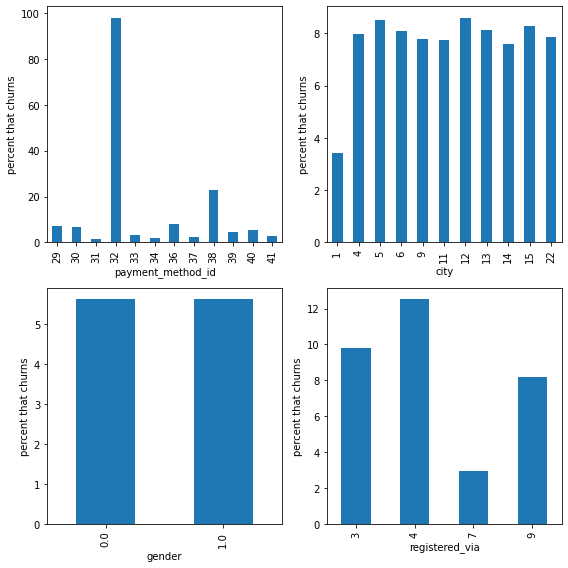

In [78]:
features = ["payment_method_id", "city", "gender", "registered_via"]
fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs = axs.flatten()
for i, feature in enumerate(features): 
    churn_pct_by_feature = (data.groupby(by=feature).is_churn.sum() / data[feature].value_counts())*100
    churn_pct_by_feature.plot(kind="bar", ax=axs[i], xlabel=feature, ylabel="percent that churns")

plt.tight_layout()
plt.show();

Insights:
* Almost 100% of the subscribers who payed with payment method id 32 churned
* Subscribers from city 1 (which is also the most populous) are the least likely to churn
* There is no correlation between gender and likelyhood of churning
* Registration method 7 is the best at retaining subscribers - less than 4% of the subscribers who registered with method 7 churned, while over 8% of subscribers churned with the other methods 

### 1.2.2 Numerical Features<a id="Numerical_Features"></a>

### 1.2.3 Boolean Features<a id="Boolean_Features"></a>